In [1]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([[0,1,1,0]])

x = np.array([[0,0,1,1],
              [0,1,0,1]])

n_x = 2
n_y = 1
n_h = 2

m = x.shape[1]

np.random.seed(42)
w1 = np.random.randn(n_h, n_x)
w2 = np.random.randn(n_y, n_h)

losses = []
w1_norms = []
w2_norms = []

In [2]:
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

def sigmoid_output_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T) / m
    dz1 = np.dot(w2.T,  dz2) * sigmoid_output_derivative(a1)
    dw1 = np.dot(dz1, x.T) / m
    
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,input)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

Stopping early at epoch 24610 with loss 0.1000


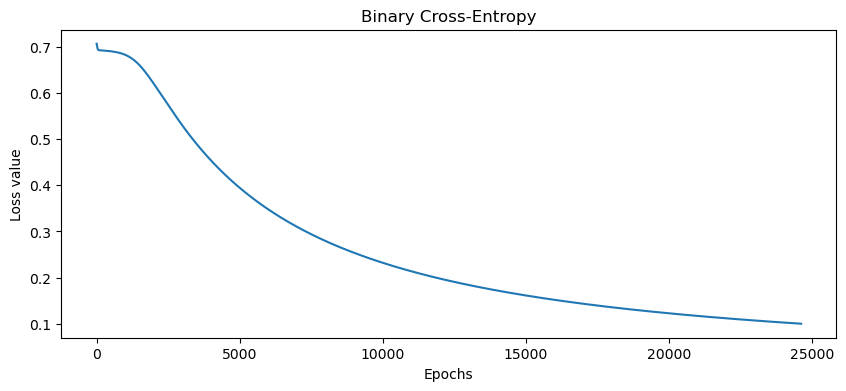

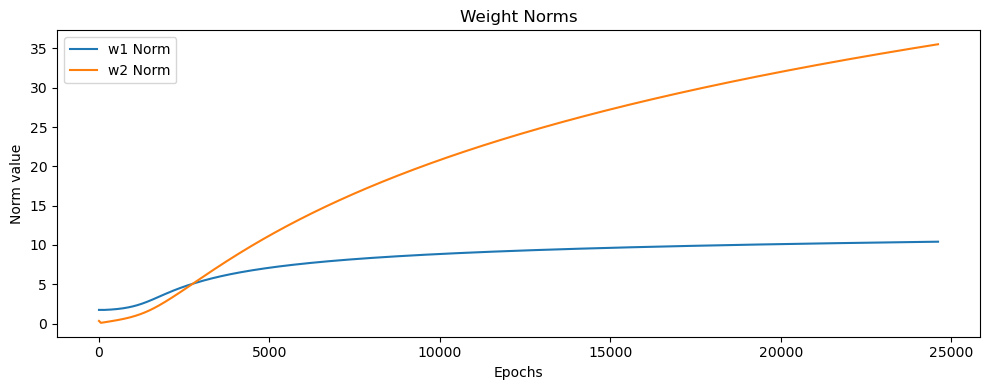

In [3]:
epochs = 50000
stop = 0.1 # Stop learning at 0.1
beta = 0.9  # Momentum coefficient
lr = 0.12

# Initialize velocity terms for w1 and w2
v1 = np.zeros_like(w1)
v2 = np.zeros_like(w2)

for i in range(epochs):
    z1, a1, z2, a2 = forward_prop(w1, w2, x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    # Stop training if loss is smaller than 0.8
    if loss < stop:
        print(f"Stopping early at epoch {i+1} with loss {loss:.4f}")
        break
    losses.append(loss)
    da2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)
    
   # Update velocities
    v1 = beta * v1 + (1 - beta) * dw1
    v2 = beta * v2 + (1 - beta) * dw2
    
    # Update weights with current learning rate and momentum
    w1 -= lr * v1
    w2 -= lr * v2
    w1_norm = np.linalg.norm(w1, 'fro')
    w2_norm = np.linalg.norm(w2, 'fro')
    w1_norms.append(w1_norm)
    w2_norms.append(w2_norm)

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Binary Cross-Entropy')
plt.xlabel("Epochs")
plt.ylabel("Loss value")

# Plot Weight Norms
plt.figure(figsize=(10, 4))
plt.plot(w1_norms, label='w1 Norm')
plt.plot(w2_norms, label='w2 Norm')
plt.title('Weight Norms')
plt.xlabel("Epochs")
plt.ylabel("Norm value")
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
test = np.array([[1],
                 [0]])

predict(w1, w2, test)
print(losses[len(losses)-1])

For input [1, 0] output is 1
0.10000195573095569
